In [1]:
import pickle

with open('./datasets/mod_05_topic_10_various_data.pkl', 'rb') as fl:
    datasets = pickle.load(fl)

In [2]:
concrete = datasets['concrete']

In [3]:
components = ['Cement',
              'BlastFurnaceSlag',
              'FlyAsh',
              'Water',
              'Superplasticizer',
              'CoarseAggregate',
              'FineAggregate']

concrete['Components'] = concrete[components].gt(0).sum(axis=1)

concrete[components + ['Components']].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(concrete)

C:\Users\k.morozova\AppData\Local\anaconda3\envs\env_mlf\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\k.morozova\AppData\Local\anaconda3\envs\env_mlf\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\k.morozova\AppData\Local\anaconda3\envs\env_mlf\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\k.morozova\AppData\Local\anacon

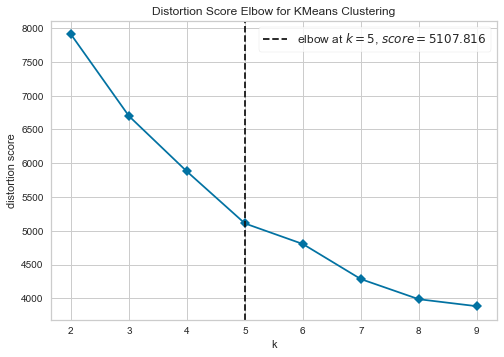

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model_kmn = KMeans(random_state=42)

visualizer = KElbowVisualizer(
    model_kmn,
    k=(2,10),
    timings=False
    )

visualizer.fit(X)
visualizer.show()

In [6]:
import pandas as pd

k_best = visualizer.elbow_value_

model_kmn  = KMeans(n_clusters=k_best, random_state=42).fit(X)


labels_kmn = pd.Series(model_kmn.labels_, name='k-means')

concrete['Cluster'] = labels_kmn

C:\Users\k.morozova\AppData\Local\anaconda3\envs\env_mlf\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [7]:
report = concrete.groupby('Cluster').median()

In [8]:
cluster_counts = concrete['Cluster'].value_counts().sort_index()
report['Count'] = cluster_counts

report.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength,Components,Count
Cluster,,,,,,,,,,,
0,382.25,117.2,0.0,162.0,11.6,936.0,781.5,28.0,56.615,6.0,198
1,186.20,183.4,0.0,192.0,0.0,965.4,748.5,28.0,26.970,5.0,177
2,340.50,47.5,0.0,228.0,0.0,932.0,670.0,270.0,43.700,5.0,48
3,213.70,0.0,121.6,175.3,8.2,1002.9,780.6,28.0,32.245,6.0,406
4,339.00,0.0,0.0,192.0,0.0,1012.0,784.0,28.0,26.850,4.0,201


In [9]:
print(report.to_string())
print("\n" + "-"*40 + "\n")

for i, row in report.iterrows():
    print(f'Cluster {i}:')
    print(row.to_string())
    print("\n" + "-"*40 + "\n")

         Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  FineAggregate    Age  CompressiveStrength  Components  Count
Cluster                                                                                                                                          
0        382.25             117.2     0.0  162.0              11.6            936.0          781.5   28.0               56.615         6.0    198
1        186.20             183.4     0.0  192.0               0.0            965.4          748.5   28.0               26.970         5.0    177
2        340.50              47.5     0.0  228.0               0.0            932.0          670.0  270.0               43.700         5.0     48
3        213.70               0.0   121.6  175.3               8.2           1002.9          780.6   28.0               32.245         6.0    406
4        339.00               0.0     0.0  192.0               0.0           1012.0          784.0   28.0               26.8

#### Cluster 0:

Cluster 0 містить рецептури з високим вмістом цементу і добавки шлаку, що призводить до високої міцності бетону. Вміст води помірний, що свідчить про середню консистенцію суміші. Значний обсяг крупного та дрібного заповнювача може впливати на структуру та стабільність бетонної суміші.

#### Cluster 1:

Cluster 1 має значно менший вміст цементу порівняно з Cluster 0, але високий вміст шлаку. Високий вміст води і відсутність суперпластифікатора може свідчити про менш пластичну суміш. Нижча міцність на стиснення вказує на те, що бетон цього кластеру має меншу міцність.

#### Cluster 2:

Cluster 2 має високий вміст цементу і низький вміст шлаку, а також значний вміст води без суперпластифікатора. Це може свідчити про дуже міцну суміш бетону, яка набирає свою максимальну міцність протягом тривалого періоду часу (270 днів). Міцність бетону є значною, але кластери з меншою кількістю рецептур.

#### Cluster 3:

Cluster 3 містить рецептури з помірним вмістом цементу і високим вмістом флай-ашу. Відсутність шлаку та додавання суперпластифікатора може покращити властивості суміші. Це найбільший кластер за кількістю рецептів (406), і він має збалансований вміст заповнювачів, що забезпечує хорошу міцність бетону та стабільність суміші.

#### Cluster 4:

Cluster 4 характеризується високим вмістом цементу і заповнювача, але відсутністю шлаку та флай-ашу. Це може свідчити про суміші, що забезпечують високу міцність при помірному вмісті води і без суперпластифікаторів. Міцність бетону тут помірна, але кількість рецептур у кластері велика.

### Загальні Висновки:

1. **Кластеризація** виявила різні підходи до формулювання бетону, які відрізняються за кількістю цементу, заповнювачів, води та добавок. Це дозволяє краще зрозуміти, як різні компоненти впливають на характеристики кінцевого продукту.

2. **Cluster 0 і Cluster 4** мають високий вміст цементу та заповнювачів, що свідчить про можливість отримання бетонних сумішей з високою міцністю, хоча різні рівні добавок і шлаку впливають на властивості суміші.

3. **Cluster 1** має більшу кількість шлаку і менше цементу, що може знижувати міцність бетону порівняно з іншими кластерами.

4. **Cluster 2** показує, що тривалий час набирає міцність (270 днів), що може бути важливим для спеціальних бетонних застосувань, де потрібно досягти високих характеристик через довгий період витримки.

5. **Cluster 3** виділяється завдяки використанню флай-ашу і суперпластифікатора, що покращує властивості суміші і забезпечує високу стабільність за рахунок оптимальної комбінації компонентів.

Цей аналіз допоможе зрозуміти, як різні рецептури впливають на властивості бетону та може бути корисним для оптимізації формулювання бетонних сумішей у різних умовах.